In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import SimpleController, PIDController
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

ONNX Runtime is using GPU
{'lataccel_cost': 5.171551461943675, 'jerk_cost': 45.904203476750894, 'total_cost': 71.76196078646927}


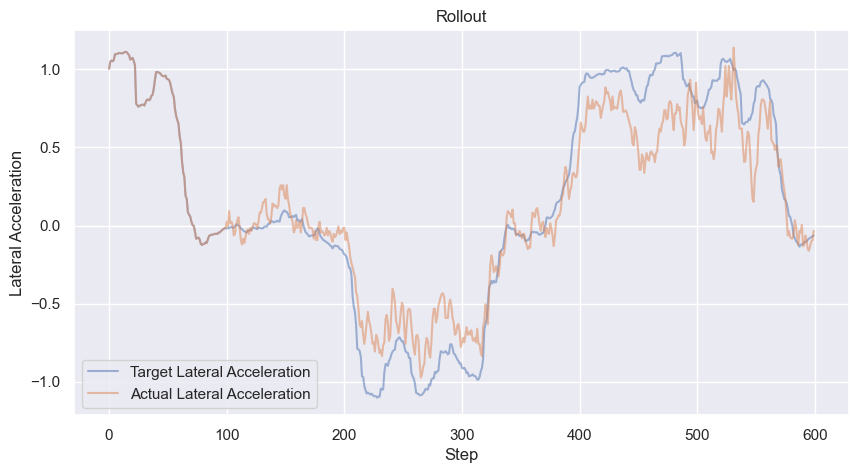

In [6]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
# controller = SimpleController()
controller = PIDController(0.3,0.05,1.0)
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
print(sim.rollout())
plot_rollout(sim)

In [4]:
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
sim.rollout()

{'lataccel_cost': 5.33136212957089,
 'jerk_cost': 44.18461501011805,
 'total_cost': 70.84142565797251}

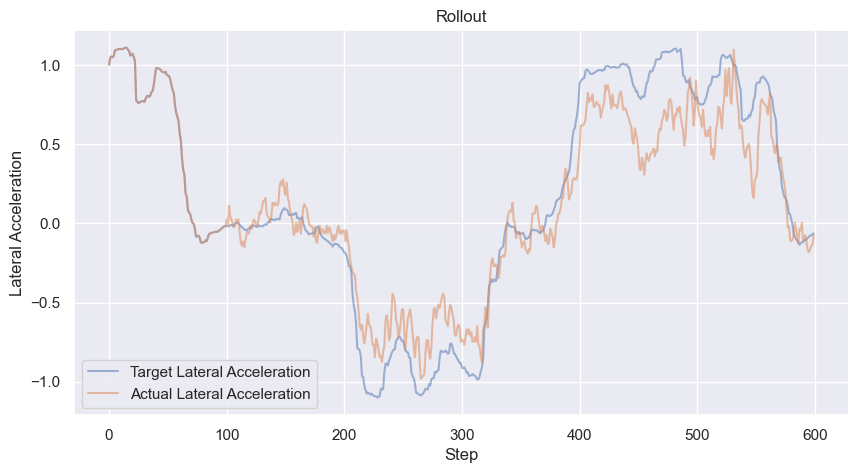

In [5]:
plot_rollout(sim)